In [1]:
#Importing Required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\adil2\\Downloads\\Data_Train.csv")

In [3]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
#Displaying dataset shape
df.shape

(10683, 11)

In [5]:
#Dataset complete information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
#Checking the null value in the dataset
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
#Checking the dataset description
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


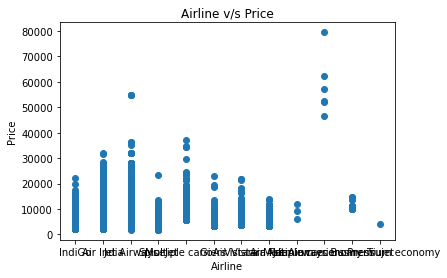

In [8]:
#plotting the scatter plot for objects to check the is there any relationship with label
plt.scatter(df.Airline,df.Price)
plt.xlabel('Airline')
plt.ylabel('Price')
plt.title('Airline v/s Price')
plt.show()

In [9]:
#Applying Label Encoder for converting string to numerical data
le = LabelEncoder()

In [10]:
#Transforming Airline columns object into numerical data
df1 = le.fit_transform(df['Airline'])
pd.Series(df1)
df['Airline'] = df1

In [11]:
#Splitting the Date_of_Journey column into day,month and year
df[['Day','Month','Year']] = df['Date_of_Journey'].str.split('/',expand = True)

In [12]:
#Dropping the columns Date_of_Journey
df = df.drop(columns = ['Date_of_Journey','Year'])

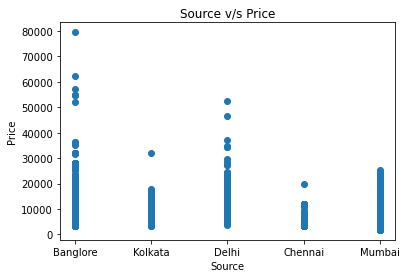

In [13]:
#plotting the scatter plot for objects to check the is there any relationship with label
plt.scatter(df.Source,df.Price)
plt.xlabel('Source')
plt.ylabel('Price')
plt.title('Source v/s Price')
plt.show()

In [14]:
#Convering the Source object columns into numerical data
df2 = le.fit_transform(df['Source'])
pd.Series(df1)
df['Source'] = df2

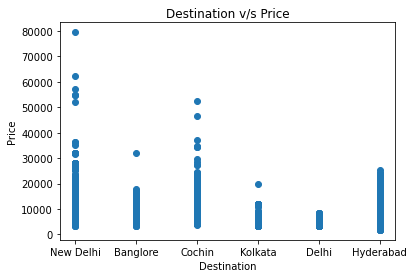

In [15]:
#plotting the scatter plot for objects to check the is there any relationship with label
plt.scatter(df.Destination,df.Price)
plt.xlabel('Destination')
plt.ylabel('Price')
plt.title('Destination v/s Price')
plt.show()

In [16]:
#Converting the Destination object columns into numerical data
df2 = le.fit_transform(df['Destination'])
pd.Series(df1)
df['Destination'] = df2

In [17]:
#As we seen the Route has null value filling nan value with Mode value because Route column is object
df['Route'] = df['Route'].fillna(df['Route'].mode()[0])

In [18]:
#Checking the values in the Route column
df.Route.value_counts

<bound method IndexOpsMixin.value_counts of 0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10683, dtype: object>

In [19]:
#Convering the Route object column into numerical data
df3 = le.fit_transform(df['Route'])
pd.Series(df1)
df['Route'] = df3

In [20]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
0,3,0,5,18,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03
1,1,3,0,84,05:50,13:15,7h 25m,2 stops,No info,7662,1,05
2,4,2,1,118,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06
3,3,3,0,91,18:05,23:30,5h 25m,1 stop,No info,6218,12,05
4,3,0,5,29,16:50,21:35,4h 45m,1 stop,No info,13302,01,03
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,19:55,22:25,2h 30m,non-stop,No info,4107,9,04
10679,1,3,0,64,20:45,23:20,2h 35m,non-stop,No info,4145,27,04
10680,4,0,2,18,08:20,11:20,3h,non-stop,No info,7229,27,04
10681,10,0,5,18,11:30,14:10,2h 40m,non-stop,No info,12648,01,03


In [21]:
#Splitting the Departure column into hours and minutes and dropping the Departure time column
df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute
df.drop(['Dep_Time'],axis = 1, inplace = True)

In [22]:
#Splitting the Arrival column into hours and minutes and dropping the Arrival time column
df['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute
df.drop(['Arrival_Time'],axis = 1, inplace = True)

In [23]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hour,Dep_min,Arrival_Hour,Arrival_min
0,3,0,5,18,2h 50m,non-stop,No info,3897,24,03,22,20,1,10
1,1,3,0,84,7h 25m,2 stops,No info,7662,1,05,5,50,13,15
2,4,2,1,118,19h,2 stops,No info,13882,9,06,9,25,4,25
3,3,3,0,91,5h 25m,1 stop,No info,6218,12,05,18,5,23,30
4,3,0,5,29,4h 45m,1 stop,No info,13302,01,03,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,2h 30m,non-stop,No info,4107,9,04,19,55,22,25
10679,1,3,0,64,2h 35m,non-stop,No info,4145,27,04,20,45,23,20
10680,4,0,2,18,3h,non-stop,No info,7229,27,04,8,20,11,20
10681,10,0,5,18,2h 40m,non-stop,No info,12648,01,03,11,30,14,10


In [24]:
#Checking the Duration columns values
df.Duration.value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
35h 35m      1
47h 40m      1
30h 15m      1
32h 55m      1
29h 30m      1
Name: Duration, Length: 368, dtype: int64

In [25]:
#Splitting the duration columns into hours and minutes
f = pd.to_timedelta(df['Duration'])
df['hours'] = f.dt.components['hours']
df['minute'] = f.dt.components['minutes']

In [26]:
#Dropping the columns Duration
df = df.drop(columns =['Duration'])

In [27]:
#Checking the total stops column values 
df.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [28]:
#As we seen Total_Stops has only one Nan value so filling with mode value as it has object column
df['Total_Stops'] = df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

In [29]:
#Splitting the total_stops in 1 stops 2 stops etc
df['Total_Stops'] = df['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops' : 2,'3 stops': 3,'4 stops': 4})

In [30]:
#Checking the Addition_info column values
df.Additional_Info.value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [31]:
#Converting the Additional_info into numerical data
df3 = le.fit_transform(df['Additional_Info'])
pd.Series(df3)
df['Additional_Info'] = df3

In [32]:
#Checking the shape of the dataset
df.shape

(10683, 15)

In [33]:
#Checking the Dataset description after converting all the object columns into numerical data
df.describe()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_min,Arrival_Hour,Arrival_min,hours,minute
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,3.965927,1.952261,1.436113,74.822896,0.824207,7.393054,9087.064121,12.490686,24.411214,13.348778,24.690630,7.729945,28.327717
std,2.352155,1.177221,1.474782,36.728405,0.675199,1.214211,4611.359167,5.748650,18.767980,6.859125,16.506036,6.420527,16.945400
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,48.000000,0.000000,8.000000,5277.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,4.000000,2.000000,1.000000,73.000000,1.000000,8.000000,8372.000000,11.000000,25.000000,14.000000,25.000000,6.000000,30.000000
75%,4.000000,3.000000,2.000000,104.000000,1.000000,8.000000,12373.000000,18.000000,40.000000,19.000000,35.000000,12.000000,45.000000
max,11.000000,4.000000,5.000000,127.000000,4.000000,9.000000,79512.000000,23.000000,55.000000,23.000000,55.000000,23.000000,55.000000


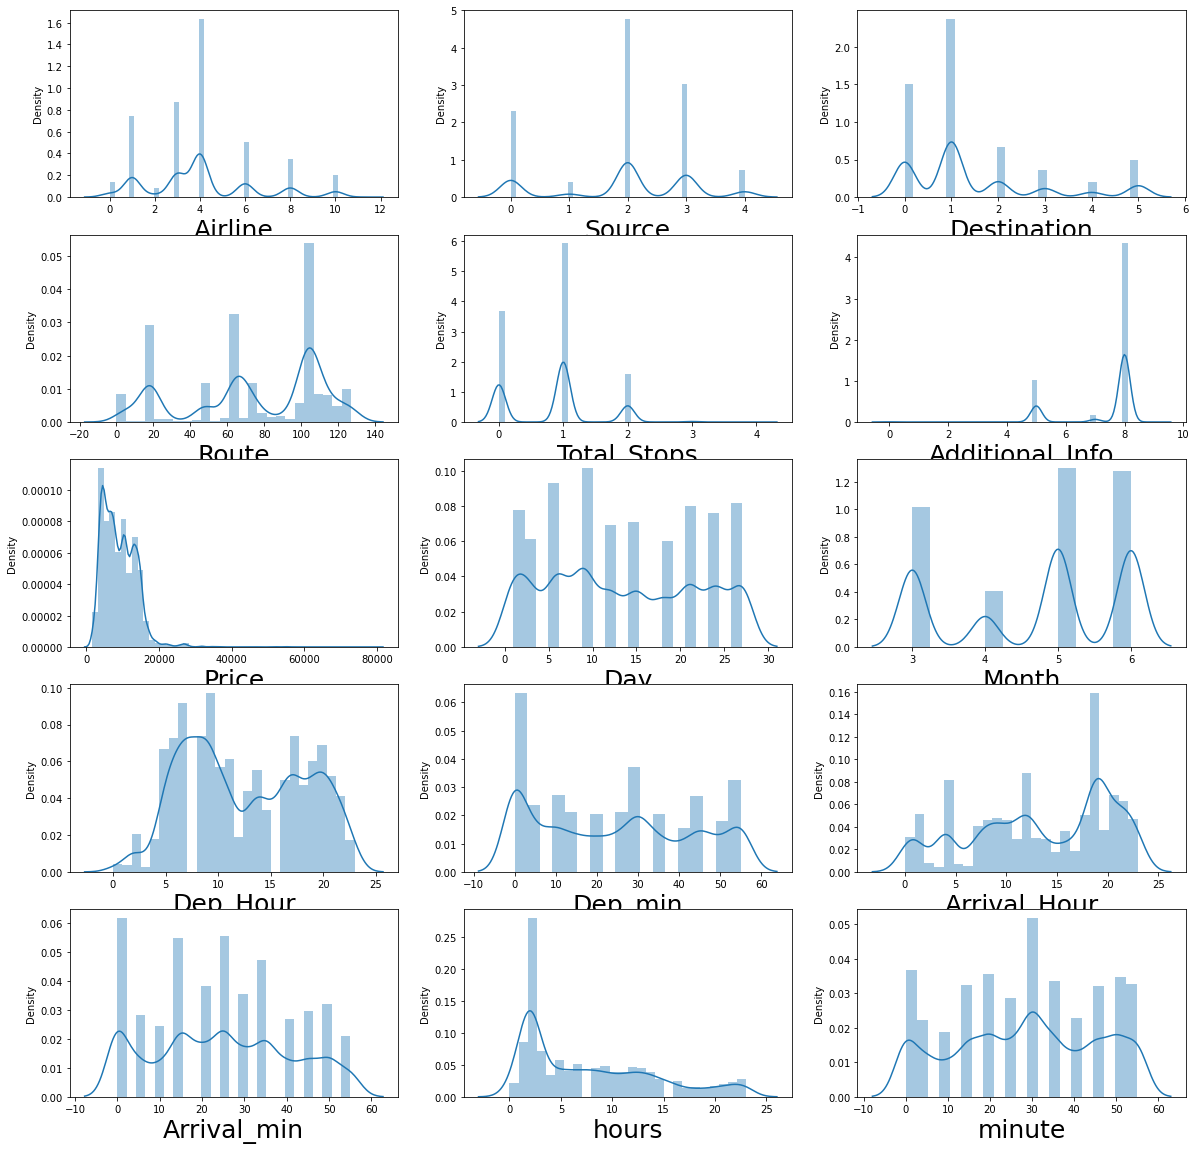

In [34]:
## distribution plot to check the data distribition
plt.figure(figsize = (20,20))
plt_num =1

for column in df:
    if plt_num<=15:
        sx = plt.subplot(5,3,plt_num)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 25)
    plt_num+=1
plt.show()

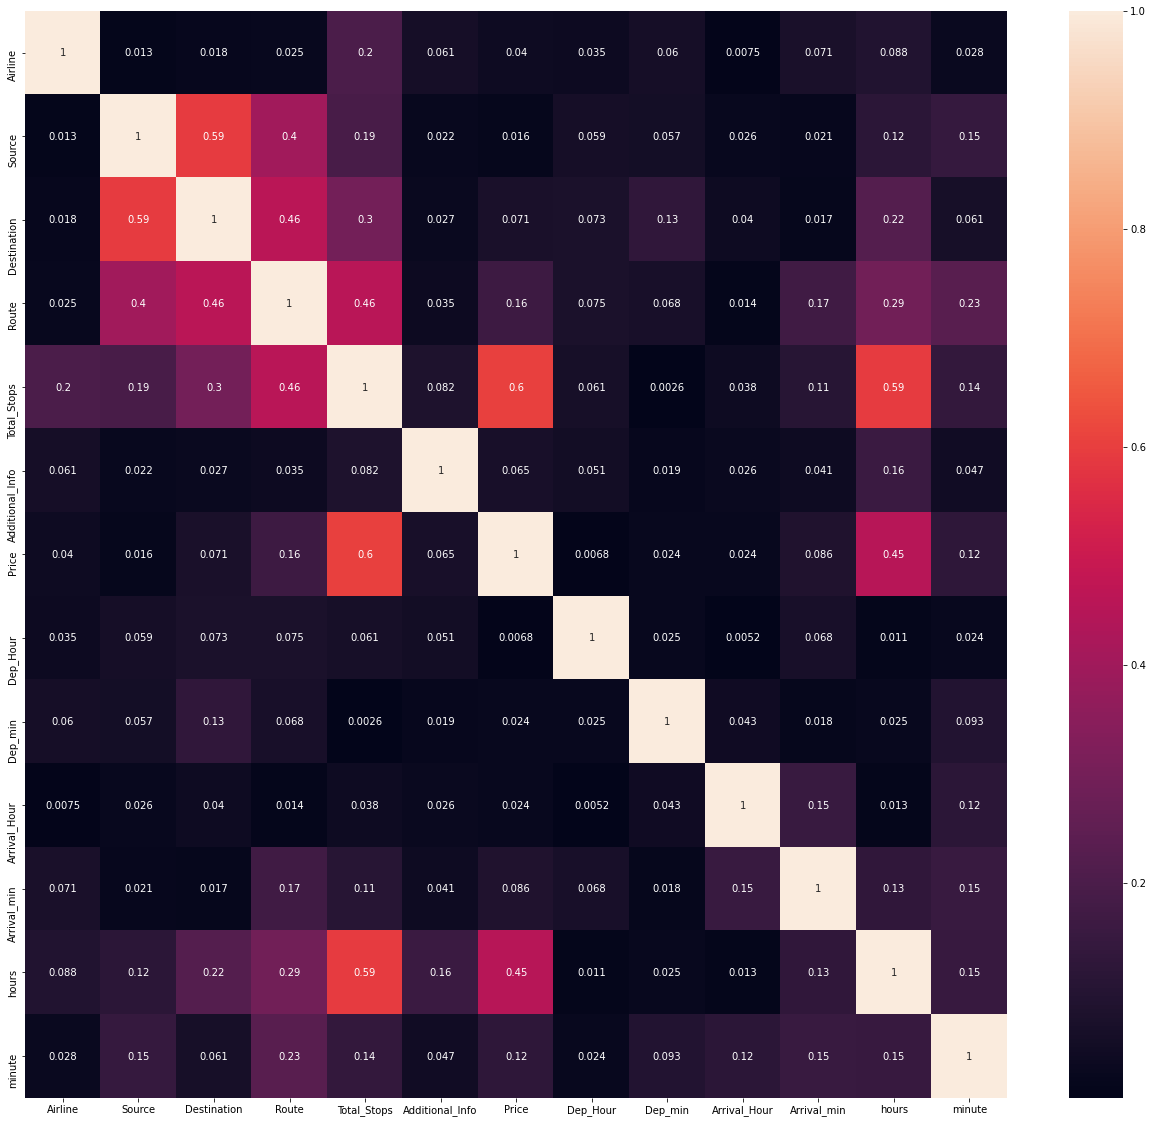

In [35]:
#Checking the relation between the features co-relation
df_corr = df.corr().abs()
plt.figure(figsize = (22,20))
sns.heatmap(df_corr,annot = True,annot_kws = {'size':10})
plt.show()

In [36]:
#Splitting features and Labels
x = df.drop(columns = ['Price'])
y = df['Price']

In [37]:
x.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Day,Month,Dep_Hour,Dep_min,Arrival_Hour,Arrival_min,hours,minute
0,3,0,5,18,0,8,24,03,22,20,1,10,2,50
1,1,3,0,84,2,8,1,05,5,50,13,15,7,25
2,4,2,1,118,2,8,9,06,9,25,4,25,19,0
3,3,3,0,91,1,8,12,05,18,5,23,30,5,25
4,3,0,5,29,1,8,01,03,16,50,21,35,4,45


In [38]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10683, dtype: int64

In [39]:
#Selecting features using SelectKBest feature selection
best_features = SelectKBest(score_func = f_classif, k=13)
fit = best_features.fit(x,y)
data_scores = pd.DataFrame(fit.scores_)
data_columns = pd.DataFrame(x.columns)

feature_scores =pd.concat([data_columns , data_scores], axis = 1)
feature_scores.columns = ['feature_Name','Score']
print(feature_scores.nlargest(13,'Score'))

       feature_Name       Score
3             Route  251.209617
4       Total_Stops  213.000127
1            Source  182.711933
2       Destination  110.990633
0           Airline   78.839558
5   Additional_Info   54.918084
7             Month   18.014361
12            hours    7.024259
10     Arrival_Hour    4.784489
9           Dep_min    3.761217
11      Arrival_min    3.527633
13           minute    3.286121
6               Day    3.110348


In [40]:
#Selecting the Best_featues which has highest score
x_new = [['Route','Total_Stops','Source','Destination','Airline','Additional_Info','Month','hours','Arrival_Hour','Dep_min','Arrival_min','minute','Day']]

In [41]:
x_new = x

In [42]:
##Transforming the dataset into standard form using StandardScaler
sc = StandardScaler()
x_sc = sc.fit_transform(x,y)

In [43]:
##splitting into training and testing data
x_train,x_test,y_train,y_test = train_test_split(x_sc,y,test_size = 0.25,random_state = 392)

In [44]:
#Using KNeighborsRegressor for regression problem
kn = KNeighborsRegressor()
kn.fit(x_train,y_train)

KNeighborsRegressor()

In [45]:
#predicting the value
y_pred = kn.predict(x_test)
y_pred

array([ 8144.2,  3205. ,  3419. , ...,  9876.4,  5277. , 10844. ])

In [46]:
#model Score
kn.score(x_test,y_test)

0.7473118339304816

In [48]:
mean_absolute_error(y_test,y_pred)

1242.7184575065519

In [49]:
# Mean squared error for checking model error
mean_squared_error(y_test,y_pred)

5137343.94715088

In [50]:
np.sqrt(mean_squared_error(y_test,y_pred))

2266.5709667140095

In [51]:
#Lasso CV 
lacv = LassoCV(alphas = None, max_iter = 1000,normalize = True)
lacv.fit(x_train,y_train)

LassoCV(normalize=True)

In [52]:
#alpha
alpha = lacv.alpha_
alpha

0.08285969213953454

In [53]:
#Lasso for model accuracy
las_knn = Lasso(alpha)
las_knn.fit(x_train,y_train)

Lasso(alpha=0.08285969213953454)

In [54]:
#Lasso Score 
las_knn.score(x_test,y_test)

0.46174897902721745

In [55]:
#RidgeCV score 
ridcv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True)
ridcv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [56]:
ridcv.alpha_

0.001

In [57]:
rd = Ridge(alpha = ridcv.alpha_)
rd.fit(x_train,y_train)

Ridge(alpha=0.001)

In [58]:
rd.score(x_test,y_test)

0.4617468737154464

In [59]:
#Using Another Algorithm for Regression DecisionTreeRegresssor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [60]:
#predicting the value
y_pred = dtr.predict(x_test)
y_pred

array([ 9646.,  3625.,  3625., ...,  8099.,  5277., 10844.])

In [61]:
#model Score
dtr.score(x_test,y_test)

0.7102250449675742

In [62]:
#Linear Regresssion
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [63]:
#Predicting the value using LinearRegression
y_pred = lr.predict(x_test)
y_pred

array([10554.66361155,  4767.46793246,  3906.03806225, ...,
        8845.27726408,  3879.72731995, 11038.37688899])

In [64]:
#LinearRegression Model Score
lr.score(x_test,y_pred)

1.0

In [65]:
## As we seen the there is no overfitting model for this regression model we used three Algorithm

#LinearRegression got 100%Accuracy
#DecisionTreeRegression and KNeighborsRegressor got the same 73% Accuracy